# Titanic Survival Prediction: Binary Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Capture intesting facts present in Survived Column

In [7]:
df["Survived"]

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int64

## Survived vs Not Survived Count

In [8]:
df["Survived"].value_counts()

0    815
1    494
Name: Survived, dtype: int64

## Survived vs Not Survived Count at Gender Level

In [9]:
pd.crosstab(df["Sex"],df["Survived"])

Survived,0,1
Sex,,
female,81,385
male,734,109


## Survived vs Not Survived Count at Gender Level and Age Level

In [10]:
woman = df[df["Sex"] == "female"]

In [11]:
woman

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1302,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1303,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


In [12]:
woman_survived = woman[woman["Survived"] == 1]
woman_not_survived = woman[woman["Survived"] == 0]

In [13]:
woman_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1302,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1303,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


In [14]:
woman_not_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [15]:
man = df[df["Sex"] == "male"]

In [16]:
man

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [17]:
man_survived = man[man["Survived"] == 1]
man_not_survived = man[man["Survived"] == 0]

In [18]:
man_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [19]:
man_not_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [20]:
# Age 1 - 100 ==> 1 - 20 bin1, 20 - 40 bin2, 40 - 60 bin3, 60 - 80 bin4, 80 - 100 bin 5

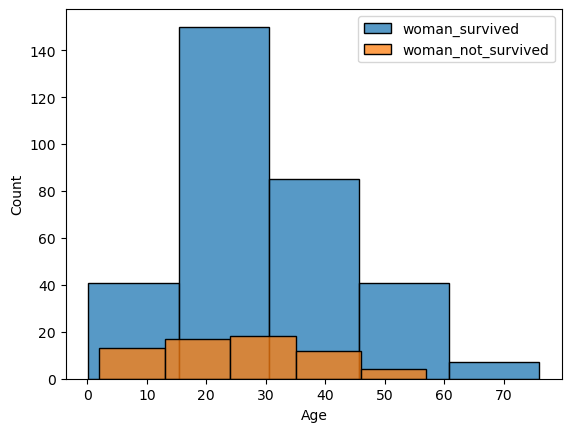

In [21]:
sns.histplot(woman_survived.Age, bins = 5, label = "woman_survived", kde = False )
sns.histplot(woman_not_survived.Age, bins = 5, label = "woman_not_survived", kde = False )
plt.legend()

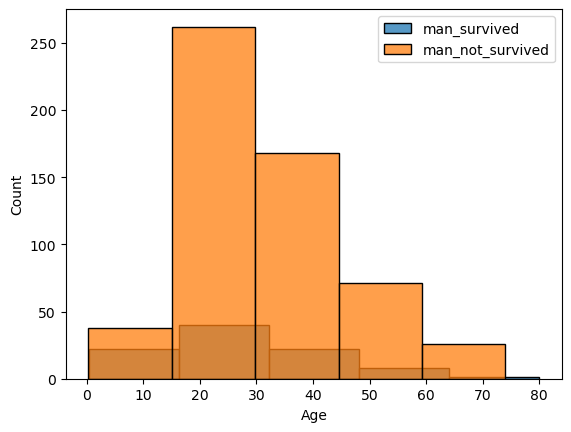

In [22]:
sns.histplot(man_survived.Age, bins = 5, label = "man_survived", kde = False )
sns.histplot(man_not_survived.Age, bins = 5, label = "man_not_survived", kde = False )
plt.legend()

#### Histogram affect by bin values. Y axis represent Count Values
#### KDE is not affect by bin values. Y axis represent Probalities Values

## Feature Engineering
* filling Missing Values
* Variable Transformation

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
len(df.columns)

12

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Checking Missing Values at Column Level

In [26]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,True,False,False,False,False,True,False
1305,False,False,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False,True,False
1307,False,False,False,False,False,True,False,False,False,False,True,False


In [27]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Visualizing Missing Values

<Axes: >

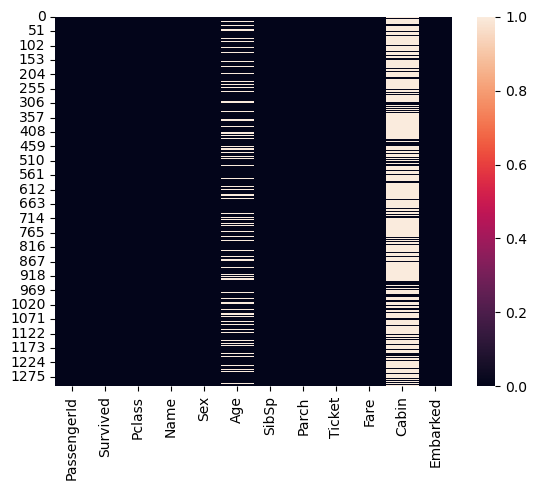

In [28]:
sns.heatmap(df.isnull())

#### Black Represent there are no missing values. White represting Missing Values. Age, Cabin

## Handling Cabin Column Missing Values

In [29]:
df.shape

(1309, 12)

In [30]:
#1) df = df.drop(["Cabin"], axis = 1)
#2) df.drop(["Cabin"], axis = 1, inplace = True)

df.drop(["Cabin"], axis = 1, inplace = True) #cabin column have 1014 missing values

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

## Handling Embarked Column Missing Values

In [33]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [34]:
df["Embarked"].value_counts() #This method specically categorical Variable

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [35]:
df["Embarked"] = df["Embarked"].fillna("S") #fill with "S" that has high frequency in that column.

In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
dtype: int64

## Handling Age Column Missing Values

In [37]:
df["Age"].nunique()

98

In [38]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 ,
       18.5 , 67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

In [39]:
df["Age"].value_counts()

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64

In [40]:
#1) Method 1 df["Age"].mean()
#2) Method 2 df["Age"].median()
#3) Method 3 df["Age"].mode() 
# These methods will apply for continious variables to handle missing values

### Demonstration of Handling Missing Values Using `np.random.randint(1,100,3)`

In [41]:
#We are going to use diffrent method
age_tmp = np.array([1,2,3,np.NAN, np.NAN, 6,7,8,np.NAN,10])
age_tmp

array([ 1.,  2.,  3., nan, nan,  6.,  7.,  8., nan, 10.])

In [42]:
random_age_tmp = np.random.randint(1,100,3)

In [43]:
random_age_tmp

array([78, 44, 12])

In [44]:
 np.isnan(age_tmp)

array([False, False, False,  True,  True, False, False, False,  True,
       False])

In [45]:
age_tmp[np.isnan(age_tmp)]

array([nan, nan, nan])

In [46]:
age_tmp[np.isnan(age_tmp)] = random_age_tmp #these random values replace null values

In [47]:
age_tmp

array([ 1.,  2.,  3., 78., 44.,  6.,  7.,  8., 12., 10.])

### Now Go for Original Dataset Age Column

In [48]:
mean_age = df["Age"].mean()
mean_age

29.881137667304014

In [49]:
std_age = df["Age"].std()
std_age

14.413493211271334

In [50]:
low_age = mean_age - std_age
low_age

15.46764445603268

In [51]:
high_age = mean_age + std_age
high_age

44.29463087857535

In [52]:
## [1, 100] ==> [15, 44]
random_ages = np.random.randint(15, 44, 263)
random_ages

array([24, 23, 36, 23, 35, 35, 42, 36, 23, 26, 30, 37, 28, 19, 18, 30, 36,
       21, 20, 25, 16, 43, 27, 37, 19, 22, 19, 16, 43, 17, 25, 17, 27, 28,
       17, 34, 40, 33, 40, 30, 30, 40, 32, 30, 21, 17, 34, 25, 20, 16, 36,
       35, 34, 33, 35, 41, 34, 42, 24, 19, 42, 31, 18, 21, 35, 37, 31, 36,
       41, 15, 15, 20, 31, 26, 35, 28, 39, 29, 19, 28, 31, 33, 20, 23, 22,
       23, 34, 21, 43, 15, 22, 34, 29, 43, 33, 25, 17, 43, 29, 41, 25, 43,
       42, 26, 43, 33, 39, 43, 38, 17, 17, 25, 18, 41, 28, 31, 23, 34, 28,
       40, 24, 25, 40, 36, 29, 25, 34, 16, 40, 28, 39, 25, 19, 26, 38, 37,
       27, 33, 15, 43, 33, 23, 19, 41, 25, 30, 31, 43, 16, 18, 15, 20, 41,
       21, 24, 41, 18, 19, 22, 19, 27, 23, 31, 18, 25, 30, 39, 38, 25, 37,
       35, 35, 39, 38, 20, 22, 18, 29, 15, 16, 30, 20, 31, 30, 28, 29, 21,
       27, 34, 35, 36, 16, 24, 38, 29, 38, 35, 18, 20, 34, 38, 19, 32, 41,
       28, 37, 20, 35, 29, 22, 25, 22, 24, 42, 26, 18, 17, 37, 30, 21, 16,
       26, 20, 28, 25, 29

In [53]:
age_copy = df["Age"].copy()

In [54]:
age_copy

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304     NaN
1305    39.0
1306    38.5
1307     NaN
1308     NaN
Name: Age, Length: 1309, dtype: float64

In [55]:
age_copy[np.isnan(age_copy)] = random_ages

In [56]:
age_copy

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304    31.0
1305    39.0
1306    38.5
1307    36.0
1308    37.0
Name: Age, Length: 1309, dtype: float64

In [57]:
df["Age"] = age_copy #assign original data column

In [58]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

## Handling Fare Column Missing Values

In [59]:
df.dropna(inplace = True) #Remove that one row in Fare Column

In [60]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Feature Engineering - Variable Transformation

In [61]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,31.0,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",male,36.0,0,0,359309,8.0500,S


In [62]:
df["Sex"].value_counts()

male      842
female    466
Name: Sex, dtype: int64

### Here we are going to apply Label Encoding using pandas `map()` function

In [63]:
df["Sex"] = df["Sex"].map({"male":"0", "female":"1"})

In [64]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",0,31.0,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",0,36.0,0,0,359309,8.0500,S


In [65]:
df["Embarked"].value_counts() #This is nomonal Variable. 

S    915
C    270
Q    123
Name: Embarked, dtype: int64

### Here we are going to apply One Hot Encoding using pandas `get_dummies()` fuction

In [66]:
boarding_point = pd.get_dummies(df["Embarked"])
boarding_point

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1304,0,0,1
1305,1,0,0
1306,0,0,1
1307,0,0,1


#### But here we want to drop one of our column. its give three columns based on 3 unique values. The reason for drop the column mulicolinearity issue. Dummy Variable Trap. This is the concept.This columns highly corelated each other. its affect model learning. Corelation should have between target variable and independent variable

#### Above 3 features are highly co-related. because we can predict `S` feature based on other two features `C`, `Q`. for that purpose we will drop one column  

In [67]:
boarding_point = pd.get_dummies(df["Embarked"], drop_first= True)
boarding_point

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
1304,0,1
1305,0,0
1306,0,1
1307,0,1


In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


#### We are dropping this columns "PassengerId","Name","Ticket". This didnt give any meaningful information

In [69]:
#We are going to drop Name, Ticket, PassengerId Columns
df.drop(["PassengerId","Name","Ticket","Embarked"],axis=1, inplace=True)

In [70]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
1304,0,3,0,31.0,0,0,8.0500
1305,1,1,1,39.0,0,0,108.9000
1306,0,3,0,38.5,0,0,7.2500
1307,0,3,0,36.0,0,0,8.0500


In [71]:
df = pd.concat([df,boarding_point], axis=1) #Concat encoded column boarding

In [72]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
1304,0,3,0,31.0,0,0,8.0500,0,1
1305,1,1,1,39.0,0,0,108.9000,0,0
1306,0,3,0,38.5,0,0,7.2500,0,1
1307,0,3,0,36.0,0,0,8.0500,0,1


## Model Bulding

In [73]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


In [74]:
X = df.drop(["Survived"], axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,0,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
1304,3,0,31.0,0,0,8.0500,0,1
1305,1,1,39.0,0,0,108.9000,0,0
1306,3,0,38.5,0,0,7.2500,0,1
1307,3,0,36.0,0,0,8.0500,0,1


In [75]:
y = df["Survived"]
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1308, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [78]:
model = LogisticRegression(max_iter=500)

In [79]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [80]:
predicted_res = model.predict(X_test)
predicted_res

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,

In [81]:
#Actual values
y_test

1013    1
1049    0
695     0
736     0
723     0
       ..
325     1
916     0
532     0
679     1
513     1
Name: Survived, Length: 393, dtype: int64

## Evaluating the model

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [83]:
accuracy_score(y_test,predicted_res) #tp + tn/tp+tn+fp+fn

0.8396946564885496

In [84]:
confusion_matrix(y_test,predicted_res)

array([[213,  27],
       [ 36, 117]], dtype=int64)

#### When we build Confusion Matrix using Sci-Kit Learn, first value 213 as `TP`,27 as `FP`, 36 as `FN`, 117 as `TN`

### Interpreting Confusion Matrix Values

In [85]:
#213 -> 1 ActualValue Survived: Model-> Survived
#27 -> 0 ActualValue Not Survived: Model-> Survived
#36 -> 1 ActualValue Survived: Model-> Not Survived
#117 -> 0 ActualValue Not Survived: Model-> Not Survived

### Classification Report

In [86]:
print(classification_report(y_test,predicted_res))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       240
           1       0.81      0.76      0.79       153

    accuracy                           0.84       393
   macro avg       0.83      0.83      0.83       393
weighted avg       0.84      0.84      0.84       393



In [87]:
y_test.value_counts() #Actual Values

0    240
1    153
Name: Survived, dtype: int64

In [88]:
print("0",(predicted_res==0).sum()) #the result is array format. thats why we use this line instead value_counts()
print("1",(predicted_res==1).sum())

0 249
1 144


In [89]:
#type((predicted_res==0).sum())

In [90]:
#predicted_res

In [91]:
#precision
#Postive Class 1
#Negative Class 0

#precision 82 % based on above table
#143 people survived(Predicted by model)- out of 143 ppl that our model predicted as survived, how many had actual value as survived

In [92]:
#recall -> 76%
#out of 153 survived people(actual values) how many the model was able to identify(predicted) as survived

In [93]:
#f1-score
#precision * recall oda harmonic mean than f1-score

In [94]:
#support its actual count values (153,240)
#accuracy 0.84 we already fount

In [95]:
#macro average = in precision , mean value of 0(0.86) & 1(0.82) class values,like vice average of recall & f1-score

In [96]:
macroaverage = (0.86 + 0.82) / 2
macroaverage

0.84

In [97]:
#Weighted Average 
((240*0.86) + (153*0.82)) / (240 + 153)

0.8444274809160306

#### If we have im-balanced dataset, we see precision, recall, f1-score and macro average. we didnt see weighted average for imbalaced dataset.

#### why we didnt see weighted average for imbalance dataset? the reason we muliply class(0,1) oda count(240,153). if class have high values, that class highly affect/influence final result/output

#### if we have balance dataset, we see accuracy and weighted average

## Prediction for Jack

In [99]:
X_test.iloc[0] #sample feature in X_test

Pclass        1
Sex           1
Age        35.0
SibSp         1
Parch         0
Fare      57.75
Q             0
S             0
Name: 1013, dtype: object

In [100]:
df.groupby("Pclass")["Fare"].max() #finding jack fare in second class

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [101]:
#now we add jack features in order to predict
jack = [[2,0,22,0,0,73.5000,0,1]] # its should be 2D Numpy array
model.predict(jack)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

#### Model predict `0` as output. Its means jack was not survived

## Prediction for Rose

In [103]:
rose = [[1,1,22,1,1,512.3292,0,1]]
model.predict(rose)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

#### Model predict `1` as output. Its means rose was survived